Converting to a ipynb file so that i can run everything individually

In [1]:

import os
import torch
from torch import nn
import torchvision 
import torchvision.datasets
import torchvision.models
import torchvision.transforms
import torch.utils.data.dataset
import torch.utils.data.dataloader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt




setting up device

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(torch.__version__)

print(torchvision.__version__)

2.9.0
0.24.0


In [3]:
from pathlib import Path



from torchvision import datasets



train_data = datasets.FashionMNIST(#gets training dataset off fashion.mnist
    root="data",#specifies the root directory where the dataset is stored
    train=True, #specifies training dataset
    download=True,
    transform=ToTensor(),#converts the images to PyTorch tensors
    target_transform= None#how do we want to transform the labels
    )

test_data = datasets.FashionMNIST(#gets test data fro fashion.mnist
    root="data",
    train=False,#specifies test dataset
    download=True,#downloads the data from the internet if it’s not available at root.
    transform=ToTensor(),
    target_transform= None #how do we want to transform the labels
)



print(len(train_data),len(test_data))



image, label = train_data[0]
testimage, testlabel = test_data[0]
class_names = train_data.classes
print(f'the different classes{class_names}')


class_to_idx = train_data.class_to_idx
print(f'the different classes and there index{class_to_idx}')

print(f'training data targets{train_data.targets}')
print(f'image shape{image.shape} ->[colour_channels,heigh,width],')
#28/28

60000 10000
the different classes['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
the different classes and there index{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}
training data targetstensor([9, 0, 0,  ..., 3, 0, 5])
image shapetorch.Size([1, 28, 28]) ->[colour_channels,heigh,width],


9


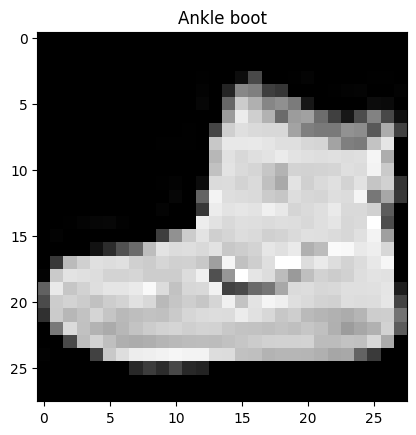

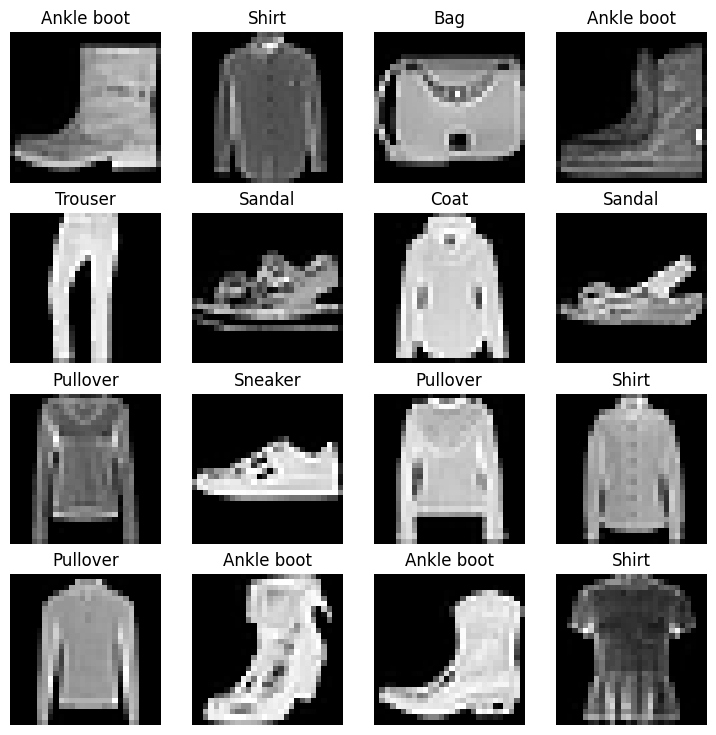

In [4]:

#the colour channel is only one because its gray scale meaning that its only black and white
print(label)

#matplot lib doesnt expect the extra colour dimensions so we have to get rid of it useing squeeze

#matplot lib interprets the colours as not gray, so we have to specify gray scale
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(class_names[label])
plt.show()


#plot more images

torch.manual_seed(42)
fig  = plt.figure(figsize = (9,9))
rows, cols =4,4

for i in range(1, rows*cols +1):
    random_idx = torch.randint(0,len(train_data),size = [1]).item()
    img,label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap = 'gray')
    plt.title(class_names[label])
    
    plt.axis(False)
    
    
plt.show()


##prepare dataloader

#currently the data is in datasets, need to convert to a dataloader

#dataloader turns our dataset into a python iterable

#and we need to batch it


#this is needed as its more computationaly efficient and it allows the nn to adjust the gradients many more times


In [5]:


BATCH_SIZE = 32

from torch.utils.data import DataLoader


train_dataloader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle = True)



test_dataloader = DataLoader(dataset = test_data,batch_size = BATCH_SIZE,  shuffle = False)


print(f'dataloaders :{train_dataloader,test_dataloader}')

print(f'length of training data loader{len(train_dataloader)} with batches of {BATCH_SIZE}')
print(f'length of training data loader{len(test_dataloader)} with batches of {BATCH_SIZE}')

train_features_batch,train_labels_batch = next(iter(train_dataloader))
print(train_features_batch.shape)
print(train_labels_batch.shape)


dataloaders :(<torch.utils.data.dataloader.DataLoader object at 0x119f3b8c0>, <torch.utils.data.dataloader.DataLoader object at 0x11a3a6850>)
length of training data loader1875 with batches of 32
length of training data loader313 with batches of 32
torch.Size([32, 1, 28, 28])
torch.Size([32])


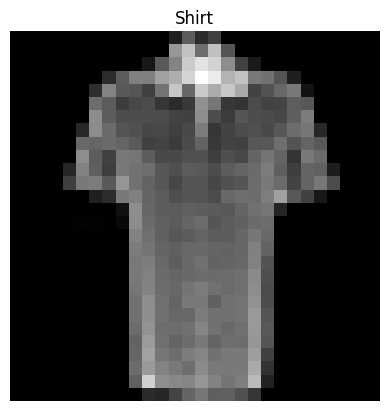

image size: torch.Size([1, 28, 28])
label : 6, label size : torch.Size([])


In [6]:

torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size = [1]).item()

img,label = train_features_batch[random_idx], train_labels_batch[random_idx]



plt.imshow(img.squeeze(), cmap = 'gray')
plt.title(class_names[label])

plt.axis(False)
plt.show()
print(f'image size: {img.shape}')

print(f'label : {label}, label size : {label.shape}')


model


In [ ]:

class FashionMNISTV2(nn.Module):
    
    #model architecture that replicates tinyVGG
    
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            #2ddata
            nn.Conv2d(in_channels= input_shape,out_channels = hidden_units,kernel_size = 3, stride = 1,padding = 1),
            #values we set ourselves in our nn are called hyperparameters,
            nn.ReLU(),
            nn.Conv2d(in_channels= hidden_units,out_channels = hidden_units,kernel_size = 3, stride = 1,padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,out_channels = hidden_units,kernel_size = 3,stride = 1,padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,out_channels = hidden_units,kernel_size = 3, stride = 1,padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units *7*7,out_features = output_shape))
        
    def forward(self,x):

        x = self.conv_block_1(x)
        #print(f'output_shape of conv-block_1:{x.shape}')
        x = self.conv_block_2(x)
        #print(f'output_shape of conv-block_2:{x.shape}')
        x = self.classifier(x)
        #print(f'output_shape of classifier:{x.shape}')
        return x 
        
        
#instantiate

torch.manual_seed(42)


model_2 = FashionMNISTV2(input_shape = 1,hidden_units = 10,output_shape = len(class_names)).to(device)


dummy check to step through layers to find error

In [8]:

torch.manual_seed(42)

#create a batch of images

images = torch.randn(size = (32,3,64,64))
test_image = images[0]
print(f'image batch shape:{images.shape}')
print(f'single imgae shape:{test_image.shape}')
print(f'test number{test_image}')

#create a single conv2d layer
                        #same as colour cahnnels of your shape(3)
                                        #equivalent to hidden units
                                                        #same as (3,3)







#steppinng through nn.maxpool2d()



conv_layer = nn.Conv2d(in_channels = 3,out_channels = 10,kernel_size= 3,stride =1,padding =0)

conv_output = conv_layer(test_image)





pool_layer  = nn.MaxPool2d(kernel_size = 2)

afterpool = pool_layer(conv_output)


print(f'test image through conv layer{conv_output}')
print(f' test image after pool layer{afterpool}')
print(f'test image original shape{test_image.shape}')
print(f'test image shape{conv_output.shape}')
print(f'test image shape{afterpool.shape}')



#create random tensor with similar number of dimensions

torch.manual_seed(42)


random_tensor = torch.rand(size = (1,1,2,2))
print(f'\n random_tensor : {random_tensor}')
print(f'random_tensor.shape:{random_tensor.shape}')

max_pool_layer = nn.MaxPool2d(kernel_size= 2)

max_pool_tensor = max_pool_layer(random_tensor)
print(f'\n Max pool tensor: \n {max_pool_tensor}')
print(f'\n Max pool tensor shape: { max_pool_tensor.shape}')#so it really compressees it


#forward pass
rand_image_tensor = torch.randn(size = (1,1,28,28))

print(rand_image_tensor.shape)


print(model_2(rand_image_tensor.to(device)))

image batch shape:torch.Size([32, 3, 64, 64])
single imgae shape:torch.Size([3, 64, 64])
test numbertensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.797

now set up loss and optim
set up eval metrics

In [9]:

def accuracy_fn(y_true, y_pred):
    """Calculates accuracy percentage."""
    correct = torch.eq(y_true, y_pred).sum().item()
    return (correct / len(y_pred)) * 100


loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_2.parameters(),lr = 0.01)


print(model_2.state_dict)


<bound method Module.state_dict of FashionMNISTV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)>


setup training and testing and timestamps

In [10]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)





def train_step(model: torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,optim : torch.optim.Optimizer,accuracy_fn,device: torch.device = device):
    model.train()
    train_loss,train_acc = 0,0
    for batch, (X,y) in enumerate(train_dataloader):

        #put data on target device
        X,y = X.to(device),y.to(device)
        
        y_pred = model(X)
        loss = loss_fn(y_pred,y)
        optim.zero_grad()
        loss.backward()
        #step the optim each batch so it adjusts more
        optim.step()
        
        train_loss += loss.item()   #because we are checking batches we must sum the total lost by all of the data
        train_acc += accuracy_fn(y_true = y,
                                 y_pred = y_pred.argmax(dim=1))
        if batch % 400 == 0:
            print(f'looked at {batch} samples')
    
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f'training loss:{train_loss:.3f}, training acc:{train_acc:.2f}%')
    
    
    
def test_step(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,accuracy_fn,device: torch.device = device):
    test_loss,test_acc = 0,0
    
    
    model.eval()
    
    
    with torch.inference_mode():
        
        for X,y in data_loader:
            #send to target dvice
            
            X,y = X.to(device),y.to(device)
            
            test_pred = model(X)
            
            
            test_loss += loss_fn(test_pred,y)
            
            test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim = 1))
            
            #adjust metrics and print out
            
            
        test_loss /= len(data_loader)
        
        test_acc /= len(data_loader)
        
        print(f'test loss:{test_loss:.3f}, test acc:{test_acc:.2f}%')
        
        

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """prints difference between start and end time."""
    total_time = end - start
    print(f'Training time on {device}: {total_time:.3f} seconds')
    return total_time

train and test and time


In [ ]:

from tqdm.auto import tqdm

from timeit import default_timer as timer
train_time_start_model_2 = timer()
epochs = 3












for epoch in tqdm(range(epochs)):

    print(f'epoch: {epoch}\n---')
    train_step(model = model_2,data_loader = train_dataloader,loss_fn = loss_fn,optim = optimizer,accuracy_fn=accuracy_fn,device = device)

    
    test_step(model = model_2,data_loader = test_dataloader,accuracy_fn = accuracy_fn,device = device,loss_fn=loss_fn)
    
train_time_end_model_2= timer()



total_train_time_model_2 = print_train_time(start = train_time_start_model_2,end = train_time_end_model_2)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
---
looked at 0 samples
looked at 400 samples
looked at 800 samples
looked at 1200 samples
looked at 1600 samples
training loss:1.038, training acc:62.35%


 33%|███▎      | 1/3 [00:18<00:37, 18.95s/it]

test loss:0.625, test acc:76.91%
epoch: 1
---
looked at 0 samples
looked at 400 samples
looked at 800 samples
looked at 1200 samples
looked at 1600 samples
training loss:0.550, training acc:80.00%


 67%|██████▋   | 2/3 [00:37<00:18, 18.59s/it]

test loss:0.498, test acc:81.59%
epoch: 2
---
looked at 0 samples
looked at 400 samples
looked at 800 samples
looked at 1200 samples
looked at 1600 samples
training loss:0.456, training acc:83.49%


100%|██████████| 3/3 [00:56<00:00, 18.76s/it]

test loss:0.441, test acc:84.22%
Training time on None: 56.277 seconds


evaluate


In [12]:


#get a resutlts dictionary
torch.manual_seed(42)
def eval_model(model :torch.nn.Module, data_loader :torch.utils.data.DataLoader,loss_fn,accuracy_fn,device):
    #return a dictionary containing the results of model rpediction on data_loader
    
    
    loss,acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):#must loop through with both x and y so that you can compare the predicted y with the datas correct label
            
            X,y = X.to(device),y.to(device)
            y_pred = model(X)#pass data thorugh the model
            #accumulate the loss and acc values per batch
            #argmax gets the index of the highest value along a given dimenson
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))
            
            #scale loss and acc to find the average loss/acc per batch
            
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name:":model.__class__.__name__,#only works when model was created with a class
            "model_loss":loss.item(),
            "\nmodel.acc":acc}
    
model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
    
)


print(model_2_results)



100%|██████████| 313/313 [00:00<00:00, 550.11it/s]

{'model_name:': 'FashionMNISTV2', 'model_loss': 0.4406145513057709, '\nmodel.acc': 84.21525559105432}


make predictions
and plot


torch.Size([1, 28, 28])


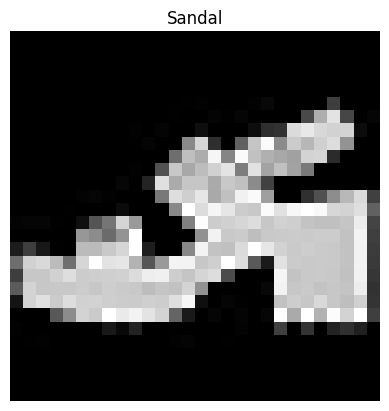

tensor([[1.7128e-07, 3.1214e-08, 6.3166e-08, 6.4942e-08, 1.1180e-08, 9.6560e-01,
         8.3339e-08, 7.7658e-05, 4.4980e-04, 3.3876e-02],
        [3.1398e-02, 7.4398e-01, 7.7151e-04, 2.1076e-01, 8.4683e-03, 7.6569e-05,
         3.6350e-03, 1.3792e-04, 7.6257e-04, 3.4403e-06]])
tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])


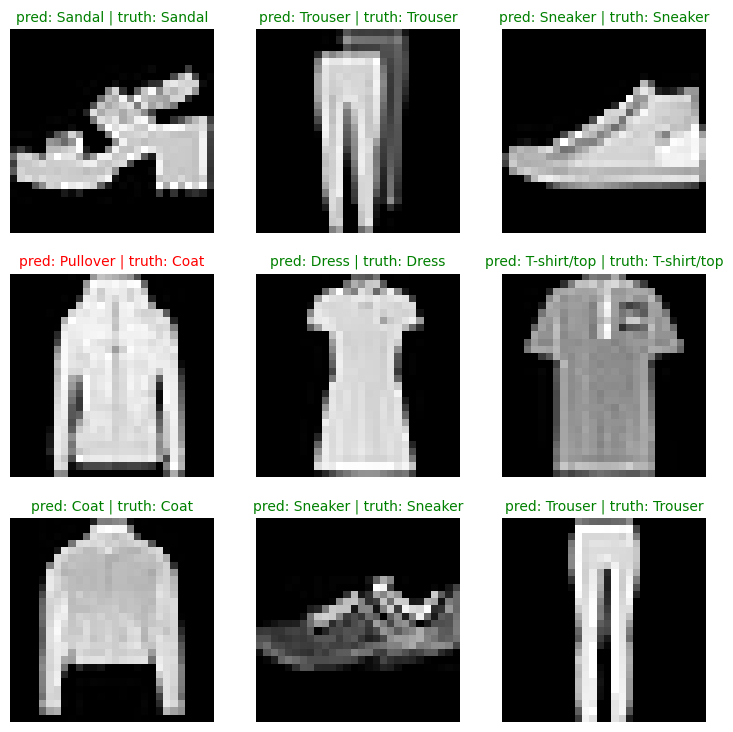

In [13]:

def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample: add a batch dimension and move to device
            # (3, 64, 64) -> (1, 3, 64, 64)
            sample = torch.unsqueeze(sample, dim=0).to(device) 

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get prediction probability (logit -> probability), must be used as we arent doing loss, which usually we use crossentropy which calculates pred probs
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Perform prediction on CPU for Matplotlib later
            pred_probs.append(pred_prob.cpu())
            
    # Stack the list of tensors into a single tensor
    return torch.stack(pred_probs)


import random
random.seed(42)
test_samples = []
test_labels = []

for sample,label in random.sample(list(test_data),k=9):


    test_samples.append(sample)
    test_labels.append(label)



print(test_samples[0].shape)







plt.imshow(test_samples[0].squeeze(),cmap = 'gray')
plt.title(class_names[test_labels[0]])
plt.axis(False)
plt.show()






pred_probs = make_predictions(model = model_2,data = test_samples,device = device)
print(pred_probs[:2])
#conmvert pred probs to lavels
pred_classes = pred_probs.argmax(dim = 1)
print(pred_classes)




#plot the images and the predictions
plt.figure(figsize = (9,9))
nrows = 3
ncols = 3

for i,sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    
    #find the prediction label in text form, eg sandal
    pred_label = class_names[pred_classes[i]]
    
    #get the true label
    truth_label = class_names[test_labels[i]]
    
    #create a title for the plot
    title_text = f'pred: {pred_label} | truth: {truth_label}'
    
    #check for equality between pred and truth and change colour of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')  # green if correct
    else:
        plt.title(title_text, fontsize=10, c='r')  # red if wrong
        
    plt.imshow(sample.squeeze(), cmap='gray')  # also: 'grey' -> 'gray' (standard spelling)
    plt.axis(False)  # turn off axis for cleaner look

plt.show() 

confusion matrix 
While accuracy tells you how often the model is right, the confusion matrix tells you where it is going wrong.

Diagonal line: Represents correct predictions.

Off-diagonal: Shows which classes are being "confused" for one another (e.g., the model thinking a "Sneaker" is an "Ankle Boot").

gathering predictions


In [14]:
#confusion matrix




#to do this we must
#make predictions, with our trained model onthe test dataset
#look at torchmetrics
#plot the confusion matrix using 'mlextend.plotting.plot_confusion_matrix'


import mlxtend


#import tqdm.auto for progress bar, already done this




#1.make predictions
y_preds = []

model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader,desc = 'making predictions . . .'):
        #send the data and targets to target device
        X,y = X.to(device), y.to(device)
        
        y_logit = model_2(X)
    
    #turn predictions to logits - > pred probs - > pred labels(argmax
    
        #must be used as we need pred probs, then gets the largest prob out of all of them, which is what it says its is answer. Think about it for instance like you think the answer to a test could be any of them, ans your not sure which, so you guess the most likely answer
        y_pred = torch.softmax(y_logit.squeeze(),dim = 0).argmax(dim = 1)
    
    #put preds in cpu for eval
    #matplot is on cpu
    
        y_preds.append(y_pred.cpu())
print(y_preds)

y_pred_tensor = torch.cat(y_preds)#concatenate list of predctions to a tensor

print(y_pred_tensor[:10])



print(len(y_pred_tensor))



making predictions . . .: 100%|██████████| 313/313 [00:00<00:00, 585.32it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 8, 3, 4, 3, 2, 6, 8, 0, 2, 7, 7, 5,
        3, 2, 6, 3, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 3, 7, 4, 7, 2, 3, 4, 6, 2, 4, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 3, 3, 3, 7, 8, 7, 0, 2, 6, 4, 3, 3, 2, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
        0, 2, 5, 3, 6, 7, 1, 8]), tensor([6, 1, 4, 2, 3, 6, 7, 2, 7, 8, 5, 7, 9, 4, 2, 5, 7, 6, 5, 2, 8, 6, 7, 8,
        6, 0, 9, 9, 3, 6, 8, 4]), tensor([1, 5, 4, 3, 5, 1, 8, 4, 6, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 6, 2,
        3, 6, 5, 2, 4, 7, 9, 3]), tensor([7, 2, 3, 5, 0, 9, 2, 7, 4, 2, 0, 5, 4, 1, 2, 1, 3, 6, 9, 1, 0, 7, 3, 8,
        7, 9, 5, 4, 4, 7, 3, 2]), tensor([3, 6, 3, 2, 8, 3, 6, 1, 3, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 3, 8, 4, 1, 3,
        3, 6, 7, 2, 8, 5, 3, 0]), tensor([7, 7, 3, 3, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 3, 9, 6, 2, 8, 6, 4,
        3, 4, 9, 7, 3, 3, 8, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 6, 6, 6, 3, 8, 9, 6, 1, 3, 6, 4, 3, 0, 8, 3, 7, 4,
       

creating confussion matrix


In [15]:
import sys
import subprocess

# Force the current python engine to install torchmetrics
subprocess.check_call([sys.executable, "-m", "pip", "install", "torchmetrics"])

# Restarting the 'brain' of the notebook is usually required after this
print("Installation finished. PLEASE RESTART YOUR RUNTIME/KERNEL NOW.")

Installation finished. PLEASE RESTART YOUR RUNTIME/KERNEL NOW.


In [16]:
import torchmetrics
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [17]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [18]:
print(test_data.targets)
print(y_preds)

tensor([9, 2, 1,  ..., 8, 1, 5])
[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 8, 3, 4, 3, 2, 6, 8, 0, 2, 7, 7, 5,
        3, 2, 6, 3, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 3, 7, 4, 7, 2, 3, 4, 6, 2, 4, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 3, 3, 3, 7, 8, 7, 0, 2, 6, 4, 3, 3, 2, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
        0, 2, 5, 3, 6, 7, 1, 8]), tensor([6, 1, 4, 2, 3, 6, 7, 2, 7, 8, 5, 7, 9, 4, 2, 5, 7, 6, 5, 2, 8, 6, 7, 8,
        6, 0, 9, 9, 3, 6, 8, 4]), tensor([1, 5, 4, 3, 5, 1, 8, 4, 6, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 6, 2,
        3, 6, 5, 2, 4, 7, 9, 3]), tensor([7, 2, 3, 5, 0, 9, 2, 7, 4, 2, 0, 5, 4, 1, 2, 1, 3, 6, 9, 1, 0, 7, 3, 8,
        7, 9, 5, 4, 4, 7, 3, 2]), tensor([3, 6, 3, 2, 8, 3, 6, 1, 3, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 3, 8, 4, 1, 3,
        3, 6, 7, 2, 8, 5, 3, 0]), tensor([7, 7, 3, 3, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 3, 9, 6, 2, 8, 6, 4,
        3, 4, 9, 7, 3, 3, 8, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 6, 6, 6, 3, 8, 9, 6, 1, 3

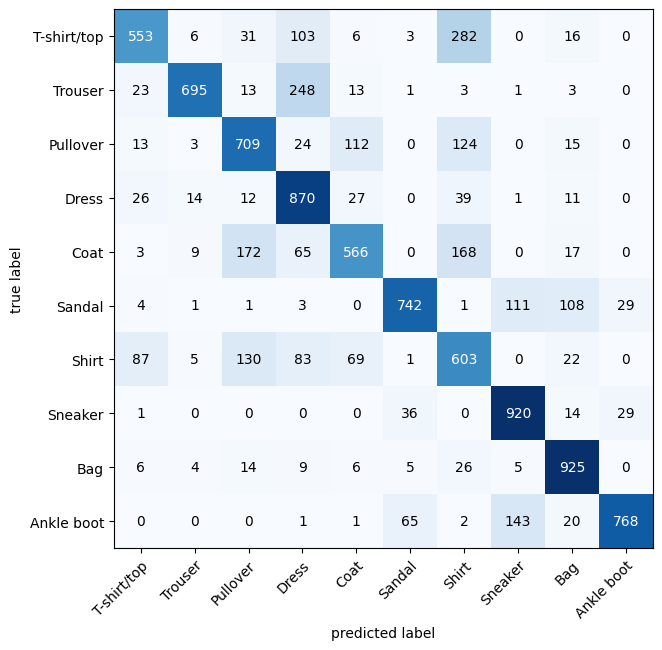

In [19]:
confmat = ConfusionMatrix(num_classes = len(class_names),task = 'multiclass')




conf_mat_tensor = confmat(preds = y_pred_tensor,target = test_data.targets)



#plot confusion matrix



fig,ax = plot_confusion_matrix(
    conf_mat = conf_mat_tensor.numpy(), #matplotlib likes numpy
    class_names = class_names,
    figsize = (10,7)
)



In [20]:
conf_mat_tensor

tensor([[553,   6,  31, 103,   6,   3, 282,   0,  16,   0],
        [ 23, 695,  13, 248,  13,   1,   3,   1,   3,   0],
        [ 13,   3, 709,  24, 112,   0, 124,   0,  15,   0],
        [ 26,  14,  12, 870,  27,   0,  39,   1,  11,   0],
        [  3,   9, 172,  65, 566,   0, 168,   0,  17,   0],
        [  4,   1,   1,   3,   0, 742,   1, 111, 108,  29],
        [ 87,   5, 130,  83,  69,   1, 603,   0,  22,   0],
        [  1,   0,   0,   0,   0,  36,   0, 920,  14,  29],
        [  6,   4,  14,   9,   6,   5,  26,   5, 925,   0],
        [  0,   0,   0,   1,   1,  65,   2, 143,  20, 768]])

save and load model

In [21]:
#save and load model meow

from pathlib import Path
#create model directory path

MODEL_PATH =Path('models')
MODEL_PATH.mkdir(parents = True,exist_ok = True)

MODEL_NAME = '03_Pytorch_computervision_model_2.pth'


MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save modell state dict

print(f'saving model to:{MODEL_SAVE_PATH}')
torch.save(obj =model_2.state_dict(),f = MODEL_SAVE_PATH)


import os
print(f"Your current folder is: {os.getcwd()}")
print(f"The file should be at: {MODEL_SAVE_PATH.absolute()}")
print(f"Does the file exist? {MODEL_SAVE_PATH.exists()}")






saving model to:models/03_Pytorch_computervision_model_2.pth
Your current folder is: /Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files
The file should be at: /Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/models/03_Pytorch_computervision_model_2.pth
Does the file exist? True


create new instance

In [22]:
torch.manual_seed(42)

#input shape depends on number of colour channels.

loaded_model_2 = FashionMNISTV2(input_shape = 1,hidden_units = 10,output_shape = len(class_names))


loaded_model_2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

#send model to target device


loaded_model_2.to(device)

FashionMNISTV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

model_2_results

In [24]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(model =loaded_model_2,data_loader = test_dataloader,loss_fn = loss_fn,accuracy_fn = accuracy_fn,device = device)

loaded_model_2_results


100%|██████████| 313/313 [00:00<00:00, 653.71it/s]


{'model_name:': 'FashionMNISTV2',
 'model_loss': 0.4406145513057709,
 '\nmodel.acc': 84.21525559105432}

In [27]:
#check if model results are lcose to eachiother


torch.isclose(torch.tensor(model_2_results['model_loss']),torch.tensor(loaded_model_2_results['model_loss']),atol = 1e-02)




tensor(True)

exercises onggg
